# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import plotly.express as px  
import plotly.io as pio
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def dice():
    dado = []
    for i in range(10):
        dado.append(random.choice(range(1,7)))
    return dado


In [3]:
lst = dice()
df = pd.DataFrame(lst, columns = ['Rolls'])
df

,Rolls
0,2
1,5
2,5
3,4
4,3
5,5
6,3
7,5
8,6
9,3


#### 2.- Plot the results sorted by value.

,Rolls
0,2
4,3
6,3
9,3
3,4
1,5
2,5
5,5
7,5
8,6


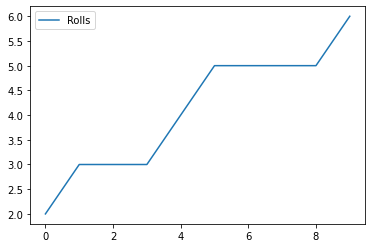

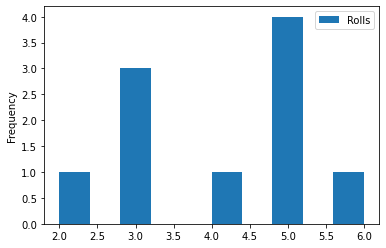

In [4]:
# your code here
df_index_sort = df.sort_values('Rolls').reset_index(drop=True)
df = df.sort_values('Rolls')
df_index_sort.plot();
df.plot.hist();
df

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

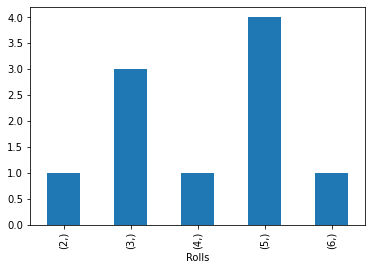

In [5]:
# your code here
df_frecuencies = df.value_counts()
df_frecuencies_sort = df_frecuencies.sort_index()
df_frecuencies_sort.plot.bar();


In [6]:
"""
In the first we represent the results according to the run, and in the second the frequency of the results.
"""

'\nIn the first we represent the results according to the run, and in the second the frequency of the results.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def mean(df, column):
    return df[[column]].sum()/df[[column]].count()


In [8]:
mean(df_index_sort,'Rolls')

Rolls    4.1
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
def frequency_distribution(data):
    frec = data.value_counts()
    return frec
def mean_frequency_distribution(data,column_for_sort):
    df_frec = pd.DataFrame(data, columns=['Times']).reset_index().sort_values(by= column_for_sort )
    df_frec['Value'] = df_frec[column_for_sort]*df_frec['Times']
    plus = df_frec['Value'].sum()
    count = df_frec['Times'].sum()
    mean = plus / count
    return mean


In [10]:
frec=frequency_distribution(df)
mean_frequency_distribution(frec,'Rolls')

4.1

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [11]:
# your code here
def median(dataset, column):
    lst = dataset[column].tolist()
    data = sorted(lst)
    index = len(data) // 2 #División redondeada hacia abajo
    
    #Par, si el resto es 0.  
    if len(lst) % 2 != 0:
        return data[index]
    
    #Impar, si el resto != de 0.
    else:
        return (data[index - 1] + data[index]) / 2

In [12]:
median(df_index_sort,'Rolls')

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
def statistical_quartiles(dataset, column, percentile):
    lst = dataset[column].tolist()
    data = sorted(lst)
    if percentile != 100:
        index = int((len(data))*percentile/100)
        #Par, si el resto es 0.  
        if len(lst) % 2 != 0:
            return data[index]

        #Impar, si el resto != de 0.
        else:
            return (data[index - 1] + data[index]) / 2
        
    elif percentile == 100:
        index = int(len(data))-1  
        return data[index]

In [14]:
print("Q1 {}".format(statistical_quartiles(df_index_sort,'Rolls', 25)))
print("Q2 {}".format(statistical_quartiles(df_index_sort,'Rolls', 50)))
print("Q3 {}".format(statistical_quartiles(df_index_sort,'Rolls', 75)))
print("Q4 {}".format(statistical_quartiles(df_index_sort,'Rolls', 100)))

Q1 3.0
Q2 4.5
Q3 5.0
Q4 6


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

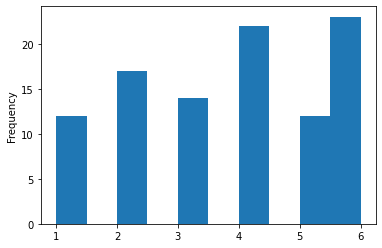

In [15]:
# your code here
df1 = pd.read_csv('../data/roll_the_dice_hundred.csv')
df1_sort = df1.sort_values(by='value')
df1_sort['value'].plot.hist();

In [16]:
"""
After 100 rolls, the numbers that come out the most are the even or odd numbers.
"""

'\nAfter 100 rolls, the numbers that come out the most are the even or odd numbers.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
# your code here
mean_1 = mean(df1_sort,'value')
df_mean = pd.DataFrame(mean_1, columns=['Mean'])
df_mean[['Mean']].values[0]

array([3.74])

#### 3.- Now, calculate the frequency distribution.


In [18]:
frec_dist = frequency_distribution(df1_sort[['value']])
frec_dist

value
6        23
4        22
2        17
3        14
1        12
5        12
dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [19]:
# your code here
df_frec = pd.DataFrame(frec_dist, columns=['Times']).reset_index().sort_values(by= 'value' )

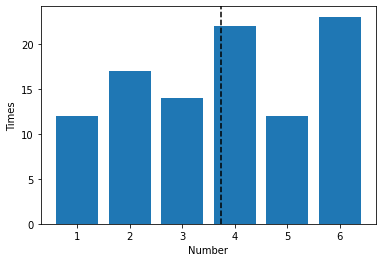

In [20]:
plt.bar(df_frec['value'],df_frec['Times'],align='center')

plt.xlabel('Number')
plt.ylabel('Times')

plt.axvline(x=df_mean[['Mean']].values[0], color="black", linestyle="--")
plt.show()

In [21]:
"""
After 100 rolls, the numbers that come out the most are the even or odd numbers.
"""

'\nAfter 100 rolls, the numbers that come out the most are the even or odd numbers.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

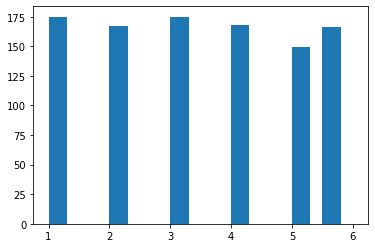

In [22]:
# your code here
df2 = pd.read_csv('../data/roll_the_dice_thousand.csv')
df2_sort = df2.sort_values(by='value')
plt.hist(df2_sort['value'],width =0.3,align='mid');

In [23]:
frec_dist_1 = frequency_distribution(df2_sort[['value']])
frec_dist_1

value
1        175
3        175
4        168
2        167
6        166
5        149
dtype: int64

In [24]:
"""
All numbers have the same possibilities.
"""

'\nAll numbers have the same possibilities.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

La media es 35
La desviación típica es 10 
observation
39.0           45
41.0           36
30.0           34
35.0           33
43.0           32
               ..
69.0            1
70.0            1
71.0            1
73.0            1
82.0            1
Length: 72, dtype: int64


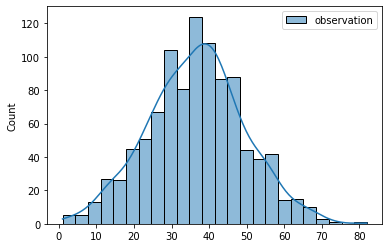

In [25]:
# your code here
df3 = pd.read_csv('../data/ages_population.csv')
frec_dist_population = frequency_distribution(df3[['observation']])

sns.histplot(df3, kde = True);
print("La media es 35")
print("La desviación típica es 10 ")

print(frec_dist_population)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [26]:
# your code here
mean_obs = df3[['observation']].mean()
std_obs = df3[['observation']].std()

print("La media de {}".format(mean_obs))
print("La desviación típica de {}".format(std_obs))

La media de observation    36.56
dtype: float64
La desviación típica de observation    12.8165
dtype: float64


In [27]:
"""
It is possible to get closer because it is a normal distribution.
"""

'\nIt is possible to get closer because it is a normal distribution.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
35.0             3
19.0             3
36.0             2
dtype: int64


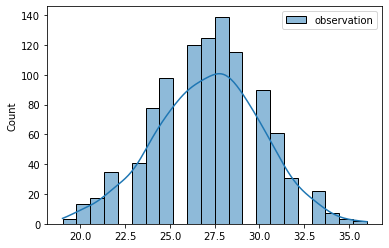

In [28]:
# your code here
df4 = pd.read_csv('../data/ages_population2.csv')
frec_dist_population2 = frequency_distribution(df4[['observation']])
print(frec_dist_population2)
sns.histplot(df4, kde = True);

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [29]:
"""
The average and the standard deviation is lower.
"""

'\nThe average and the standard deviation is lower.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [30]:
# your code here
mean2_obs = df4[['observation']].mean()
std2_obs = df4[['observation']].std()

print("La media de {}".format(mean2_obs))
print("La desviación típica de {}".format(std2_obs))

print("La diferencia de las medias de {}".format(mean_obs - mean2_obs))
print("La desviación típica de {}".format(std_obs - std2_obs))

La media de observation    27.155
dtype: float64
La desviación típica de observation    2.969814
dtype: float64
La diferencia de las medias de observation    9.405
dtype: float64
La desviación típica de observation    9.846686
dtype: float64


In [31]:
"""
The normal distribution has flattened and there are not so many extreme values.
"""

'\nThe normal distribution has flattened and there are not so many extreme values.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

observation
39.0           45
41.0           36
30.0           34
35.0           33
43.0           32
               ..
69.0            1
70.0            1
71.0            1
73.0            1
82.0            1
Length: 72, dtype: int64


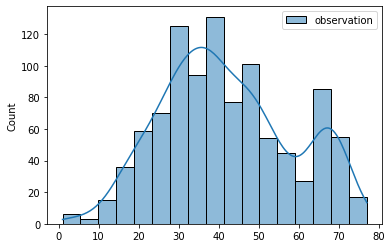

In [32]:
# your code here
df5 = pd.read_csv('../data/ages_population3.csv')
frec_dist_population3 = frequency_distribution(df5[['observation']])
sns.histplot(df5, kde = True);
print(frec_dist_population)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [33]:
# your code here
mean3_obs = df5[['observation']].mean()
std3_obs = df5[['observation']].std()

print("La media de {}".format(mean3_obs))
print("La desviación típica de {}".format(std3_obs))

print("La diferencia de las medias de {}".format(mean_obs - mean3_obs))
print("La desviación típica de {}".format(std_obs - std3_obs))

La media de observation    41.989
dtype: float64
La desviación típica de observation    16.144706
dtype: float64
La diferencia de las medias de observation   -5.429
dtype: float64
La desviación típica de observation   -3.328206
dtype: float64


In [34]:
"""
There are values to the right of the distribution that cause the standard deviation and the mean to increase.
"""

'\nThere are values to the right of the distribution that cause the standard deviation and the mean to increase.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [35]:
# your code here
print("Q1 {}".format(statistical_quartiles(df5,'observation', 25)))
print("Q2 {}".format(statistical_quartiles(df5,'observation', 50)))
print("Q3 {}".format(statistical_quartiles(df5,'observation', 75)))
print("Q4 {}".format(statistical_quartiles(df5,'observation', 100)))
median3_obs = df5[['observation']].median()
print("Le media menos la mediana: {}".format(int(mean3_obs) - int(median3_obs)))

Q1 30.0
Q2 40.0
Q3 53.0
Q4 77.0
Le media menos la mediana: 1


In [36]:
"""
There are many values concentrated in the 35 years, but there are a similar number of values scattered in the other half of the distribution.
"""

'\nThere are many values concentrated in the 35 years, but there are a similar number of values scattered in the other half of the distribution.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [37]:
# your code here
print("5%  -- {}".format(statistical_quartiles(df5,'observation', 5)))
print("15% -- {}".format(statistical_quartiles(df5,'observation', 15)))
print("30% -- {}".format(statistical_quartiles(df5,'observation', 30)))
print("45% -- {}".format(statistical_quartiles(df5,'observation', 45)))
print("50% -- {}".format(statistical_quartiles(df5,'observation', 50)))
print("60% -- {}".format(statistical_quartiles(df5,'observation', 60)))
print("75% -- {}".format(statistical_quartiles(df5,'observation', 75)))
print("95% -- {}".format(statistical_quartiles(df5,'observation', 95)))

5%  -- 17.0
15% -- 25.0
30% -- 32.0
45% -- 38.0
50% -- 40.0
60% -- 45.0
75% -- 53.0
95% -- 70.0


In [38]:
"""
In the previous percentiles it is observed that the dispersion is after 50%.
"""

'\nIn the previous percentiles it is observed that the dispersion is after 50%.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [39]:
# your code here

In [40]:
"""
your comments here
"""

'\nyour comments here\n'